In [45]:
# import modules and libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [46]:
# import data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
print(type(mnist))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>


In [47]:
# start session
sess = tf.InteractiveSession()

c:\users\tdody\appdata\local\continuum\anaconda2\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [48]:
# information about the dataset
print("Images pixel count:",mnist.test.images.shape[1])
print("Target dataset shape:",mnist.train.labels.shape[1])
print("Training set size:",mnist.train.num_examples)
print("Test set size:",mnist.test.num_examples)

Images pixel count: 784
Target dataset shape: 10
Training set size: 55000
Test set size: 10000


In [49]:
# placeholders for dataset and target feature
x = tf.placeholder(dtype=tf.float32,shape=(None,mnist.train.images.shape[1]))
y = tf.placeholder(dtype=tf.float32,shape=(None,mnist.train.labels.shape[1]))

# control
print("x shape:",x.shape)
print("y shape:",y.shape)

x shape: (?, 784)
y shape: (?, 10)


In [50]:
# NN weights and biais y = x*W+b
W = tf.Variable(tf.zeros([mnist.test.images.shape[1],mnist.test.labels.shape[1]]))
b = tf.Variable(tf.zeros([mnist.test.labels.shape[1]]))

# control
print("W shape:",W.shape)
print("b shape:",b.shape)

W shape: (784, 10)
b shape: (10,)


In [51]:
y_pred = tf.nn.softmax(tf.matmul(x, W) + b)

In [52]:
# compute metric
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), reduction_indices=[1]))

In [53]:
# train using gradient descent
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [54]:
# initialize variables
sess.run(tf.global_variables_initializer())

In [55]:
# mini batch iteration
for _ in range(1000):
    # fill batch
    batch = mnist.train.next_batch(batch_size=100)
    
    # run step
    sess.run(train_step, feed_dict={x: batch[0], y: batch[1]})

In [56]:
# evaluation
correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))


0.9179


In [57]:
# Display some erroneous predictions

y_pred_val_classes = sess.run(y_pred, feed_dict={x: mnist.test.images}).argmax(axis=1)
y_real_val_classes = mnist.test.labels.argmax(axis=1)
y_real_train_classes = mnist.train.labels.argmax(axis=1)

y_pred = sess.run(y_pred, feed_dict={x: mnist.test.images})
X_val = mnist.test.images

# Isolate errors indexes
err = (y_pred_val_classes - y_real_val_classes != 0)

# Store corresponding records

# Error on predictions
y_pred_val_classes_err = y_pred_val_classes[err]

# Prediction on validation set (proba)
y_pred_val_err = y_pred[err]

# Real labels (vector)
y_real_val_err = y_real_val_classes[err] 

# Inputs
X_val_err = X_val[err]

# Helper function
def displayErrors(err,X_val_err, y_pred_val_classes_err,y_real_val_classes_err):
    """Show 9 errors"""
    n_rows = 3
    n_cols = 3
    n=0 # subplot index
    
    # Instantiate plot
    fig, ax = plt.subplots(n_rows,n_cols,sharex=True,sharey=True, figsize=(15, 15))
    
    for row in range(n_rows):
        for col in range(n_cols):
            error = err[n]
            ax[row,col].imshow((X_val_err[error].reshape((28,28))),cmap='gray')
            ax[row,col].set_title("Predicted :{}\nTrue :{}".format(y_pred_val_classes_err[error],y_real_val_classes_err[error]))
            n+=1
            
# Identify the "worst" prediction using the largest probabilities on the erroneous set
y_pred_prob_err = np.max(y_pred_val_err,axis = 1)

# Identify the probabilities associated to the true values
true_prob_err = np.diagonal(np.take(y_pred_val_err, y_real_train_classes, axis=1))
    
# Compute difference in probabilities between the prediction and the true value
delta_pred_true_errors = y_pred_prob_err - true_prob_err

# Sort list
sorted_delta_pred = np.argsort(delta_pred_true_errors)

# Worst predictions to be plotted 
most_important_errors = sorted_delta_pred[-9:]

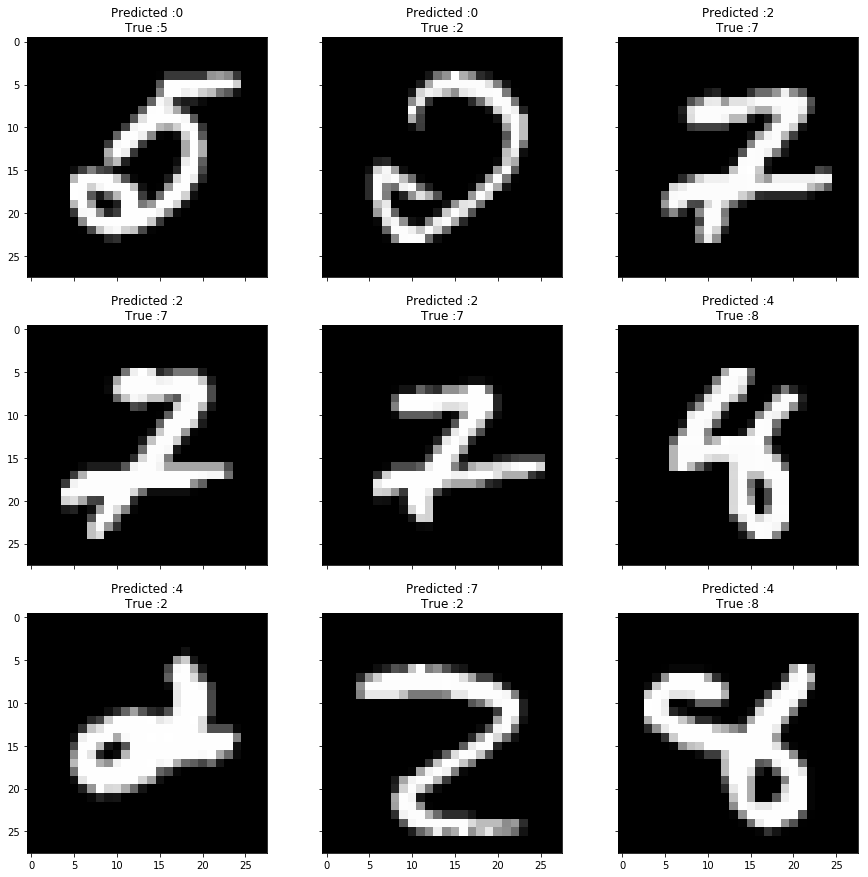

In [58]:
displayErrors(most_important_errors, X_val_err, y_pred_val_classes_err, y_real_val_err)